## yfinance dataset

In [2]:
import pandas as pd
import yfinance as yf

In [33]:
# Getting test dataset to work with

hourDat_ori = yf.download('AAPL', interval='60m', start='2024-8-19', end='2024-10-10')
daily_ori = yf.download('AAPL', interval='1d', start='2024-8-19', end='2024-10-10')
thirty_ori = yf.download('AAPL', interval='30m', start='2024-8-19', end='2024-10-10')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
# Setting up the datetime indices and values
# Changing the column names to ease data identification

hourDat = hourDat_ori.copy()
daily = daily_ori.copy()
thirty = thirty_ori.copy()

hourDat.index = pd.to_datetime(hourDat.index, utc=True)
daily.index = pd.to_datetime(daily.index, utc=True)
thirty.index = pd.to_datetime(thirty.index, utc=True)
thirty.columns = ['T_' + colName for colName in thirty.columns]
hourDat.columns = ['H_' + originalColName for originalColName in hourDat.columns]
daily.columns = ['D_' + oriCol for oriCol in daily.columns]
thirty['MainIndex'] = thirty.index
thirty['JustDate'] = thirty.index.date
hourDat['JustDate'] = hourDat.index.date
daily['JustDate'] = daily.index.date

In [35]:
# Merging 30M and 1H dataframes based on matching indices (datetime)

testNoChange = pd.merge(thirty, hourDat,how='left', left_index=True, right_index=True)

In [36]:
# Verifying merge length is correct - right length should follow lenghth of left df before merging

print(f'Length before merging: {len(thirty)}')
print(f'Length after meging: {len(testNoChange)}')

Length before merging: 481
Length after meging: 481


In [37]:
testNoChange.head()

,T_Open,T_High,T_Low,T_Close,T_Adj Close,T_Volume,MainIndex,JustDate_x,H_Open,H_High,H_Low,H_Close,H_Adj Close,H_Volume,JustDate_y
Datetime,,,,,,,,,,,,,,,
2024-08-19 09:30:00+00:00,225.695007,225.695007,224.115997,224.380005,224.380005,5107625,2024-08-19 09:30:00+00:00,2024-08-19,225.695007,225.695007,223.039993,224.160004,224.160004,9670189.0,2024-08-19
2024-08-19 10:00:00+00:00,224.399994,224.520004,223.039993,224.160004,224.160004,4562564,2024-08-19 10:00:00+00:00,2024-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-19 10:30:00+00:00,224.160004,224.350006,223.490005,224.210007,224.210007,2141973,2024-08-19 10:30:00+00:00,2024-08-19,224.160004,224.729996,223.490005,224.430206,224.430206,4193053.0,2024-08-19
2024-08-19 11:00:00+00:00,224.210007,224.729996,223.929993,224.430206,224.430206,2051080,2024-08-19 11:00:00+00:00,2024-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-19 11:30:00+00:00,224.427597,224.649994,223.750000,223.864700,223.864700,1514451,2024-08-19 11:30:00+00:00,2024-08-19,224.427597,224.649994,223.750000,224.425003,224.425003,3379602.0,2024-08-19


In [38]:
mergedAll = pd.merge(testNoChange, daily, how='left', left_on='JustDate_x', right_on='JustDate')

In [39]:
# Verifying merge length is correct - right length should follow lenghth of left df before merging

print(f'Length before merging: {len(testNoChange)}')
print(f'Length after meging: {len(mergedAll)}')

Length before merging: 481
Length after meging: 481


In [40]:
mergedAll.head()

,T_Open,T_High,T_Low,T_Close,T_Adj Close,T_Volume,MainIndex,JustDate_x,H_Open,H_High,...,H_Adj Close,H_Volume,JustDate_y,D_Open,D_High,D_Low,D_Close,D_Adj Close,D_Volume,JustDate
0,225.695007,225.695007,224.115997,224.380005,224.380005,5107625,2024-08-19 09:30:00+00:00,2024-08-19,225.695007,225.695007,...,224.160004,9670189.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
1,224.399994,224.520004,223.039993,224.160004,224.160004,4562564,2024-08-19 10:00:00+00:00,2024-08-19,NaN,NaN,...,NaN,NaN,NaN,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2,224.160004,224.350006,223.490005,224.210007,224.210007,2141973,2024-08-19 10:30:00+00:00,2024-08-19,224.160004,224.729996,...,224.430206,4193053.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
3,224.210007,224.729996,223.929993,224.430206,224.430206,2051080,2024-08-19 11:00:00+00:00,2024-08-19,NaN,NaN,...,NaN,NaN,NaN,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
4,224.427597,224.649994,223.750000,223.864700,223.864700,1514451,2024-08-19 11:30:00+00:00,2024-08-19,224.427597,224.649994,...,224.425003,3379602.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19


In [41]:
mergedAll = mergedAll.set_index('MainIndex')
mergedAll.head()

,T_Open,T_High,T_Low,T_Close,T_Adj Close,T_Volume,JustDate_x,H_Open,H_High,H_Low,...,H_Adj Close,H_Volume,JustDate_y,D_Open,D_High,D_Low,D_Close,D_Adj Close,D_Volume,JustDate
MainIndex,,,,,,,,,,,,,,,,,,,,,
2024-08-19 09:30:00+00:00,225.695007,225.695007,224.115997,224.380005,224.380005,5107625,2024-08-19,225.695007,225.695007,223.039993,...,224.160004,9670189.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2024-08-19 10:00:00+00:00,224.399994,224.520004,223.039993,224.160004,224.160004,4562564,2024-08-19,NaN,NaN,NaN,...,NaN,NaN,NaN,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2024-08-19 10:30:00+00:00,224.160004,224.350006,223.490005,224.210007,224.210007,2141973,2024-08-19,224.160004,224.729996,223.490005,...,224.430206,4193053.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2024-08-19 11:00:00+00:00,224.210007,224.729996,223.929993,224.430206,224.430206,2051080,2024-08-19,NaN,NaN,NaN,...,NaN,NaN,NaN,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2024-08-19 11:30:00+00:00,224.427597,224.649994,223.750000,223.864700,223.864700,1514451,2024-08-19,224.427597,224.649994,223.750000,...,224.425003,3379602.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19


In [53]:
cleanNA = mergedAll.copy()
cleanNA = cleanNA.ffill()
cleanNA.iloc[10:15]

,T_Open,T_High,T_Low,T_Close,T_Adj Close,T_Volume,JustDate_x,H_Open,H_High,H_Low,...,H_Adj Close,H_Volume,JustDate_y,D_Open,D_High,D_Low,D_Close,D_Adj Close,D_Volume,JustDate
MainIndex,,,,,,,,,,,,,,,,,,,,,
2024-08-19 14:30:00+00:00,224.645004,224.919998,224.580002,224.785004,224.785004,1446587,2024-08-19,224.645004,224.949997,224.580002,...,224.929993,2814556.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2024-08-19 15:00:00+00:00,224.779999,224.949997,224.669998,224.929993,224.929993,1367969,2024-08-19,224.645004,224.949997,224.580002,...,224.929993,2814556.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2024-08-19 15:30:00+00:00,224.925003,225.970001,224.889999,225.899994,225.899994,4867293,2024-08-19,224.925003,225.970001,224.889999,...,225.899994,4867293.0,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,2024-08-19
2024-08-20 09:30:00+00:00,225.770004,227.169998,225.449997,227.020004,227.020004,5111798,2024-08-20,225.770004,227.169998,225.449997,...,226.660004,7693400.0,2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000,2024-08-20
2024-08-20 10:00:00+00:00,227.020004,227.080002,226.050003,226.660004,226.660004,2581602,2024-08-20,225.770004,227.169998,225.449997,...,226.660004,7693400.0,2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000,2024-08-20


In [43]:
cleanNA.iloc[8]

T_Open         224.029999
T_High         224.350006
T_Low          223.800003
T_Close        224.315002
T_Adj Close    224.315002
T_Volume          1330731
JustDate_x     2024-08-19
H_Open         224.029999
H_High         224.660004
H_Low          223.800003
H_Close        224.639999
H_Adj Close    224.639999
H_Volume        3556772.0
JustDate_y     2024-08-19
D_Open         225.720001
D_High         225.990005
D_Low          223.039993
D_Close        225.889999
D_Adj Close    225.889999
D_Volume         40687800
JustDate       2024-08-19
Name: 2024-08-19 13:30:00+00:00, dtype: object

In [44]:
cleanNA.iloc[10]

T_Open         224.645004
T_High         224.919998
T_Low          224.580002
T_Close        224.785004
T_Adj Close    224.785004
T_Volume          1446587
JustDate_x     2024-08-19
H_Open         224.645004
H_High         224.949997
H_Low          224.580002
H_Close        224.929993
H_Adj Close    224.929993
H_Volume        2814556.0
JustDate_y     2024-08-19
D_Open         225.720001
D_High         225.990005
D_Low          223.039993
D_Close        225.889999
D_Adj Close    225.889999
D_Volume         40687800
JustDate       2024-08-19
Name: 2024-08-19 14:30:00+00:00, dtype: object

In [45]:
hourDat.head(5)

,H_Open,H_High,H_Low,H_Close,H_Adj Close,H_Volume,JustDate
Datetime,,,,,,,
2024-08-19 09:30:00+00:00,225.695007,225.695007,223.039993,224.160004,224.160004,9670189,2024-08-19
2024-08-19 10:30:00+00:00,224.160004,224.729996,223.490005,224.430206,224.430206,4193053,2024-08-19
2024-08-19 11:30:00+00:00,224.427597,224.649994,223.750000,224.425003,224.425003,3379602,2024-08-19
2024-08-19 12:30:00+00:00,224.410004,224.464996,223.750000,224.024994,224.024994,2649753,2024-08-19
2024-08-19 13:30:00+00:00,224.029999,224.660004,223.800003,224.639999,224.639999,3556772,2024-08-19


In [46]:
hourDat.iloc[[1]]

,H_Open,H_High,H_Low,H_Close,H_Adj Close,H_Volume,JustDate
Datetime,,,,,,,
2024-08-19 10:30:00+00:00,224.160004,224.729996,223.490005,224.430206,224.430206,4193053,2024-08-19


In [52]:
thirty.iloc[2:5]

,T_Open,T_High,T_Low,T_Close,T_Adj Close,T_Volume,MainIndex,JustDate
Datetime,,,,,,,,
2024-08-19 10:30:00+00:00,224.160004,224.350006,223.490005,224.210007,224.210007,2141973,2024-08-19 10:30:00+00:00,2024-08-19
2024-08-19 11:00:00+00:00,224.210007,224.729996,223.929993,224.430206,224.430206,2051080,2024-08-19 11:00:00+00:00,2024-08-19
2024-08-19 11:30:00+00:00,224.427597,224.649994,223.750000,223.864700,223.864700,1514451,2024-08-19 11:30:00+00:00,2024-08-19


In [59]:
for index, row in hourDat.iterrows():
    if row.JustDate == daily.JustDate[0]:
        print('found match')
        break

found match


C:\Users\kywong\AppData\Local\Temp\ipykernel_9992\110502246.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row.JustDate == daily.JustDate[0]:


In [21]:
testChange = pd.to_datetime(hourDat.index, utc=True)

In [22]:
testChange[0]

Timestamp('2023-01-03 14:30:00+0000', tz='UTC')

In [24]:
testDay = pd.to_datetime(daily.index, utc=True)
testDay

DatetimeIndex(['2023-01-03 00:00:00+00:00', '2023-01-04 00:00:00+00:00',
               '2023-01-05 00:00:00+00:00', '2023-01-06 00:00:00+00:00',
               '2023-01-09 00:00:00+00:00', '2023-01-10 00:00:00+00:00',
               '2023-01-11 00:00:00+00:00', '2023-01-12 00:00:00+00:00',
               '2023-01-13 00:00:00+00:00', '2023-01-17 00:00:00+00:00',
               ...
               '2023-12-15 00:00:00+00:00', '2023-12-18 00:00:00+00:00',
               '2023-12-19 00:00:00+00:00', '2023-12-20 00:00:00+00:00',
               '2023-12-21 00:00:00+00:00', '2023-12-22 00:00:00+00:00',
               '2023-12-26 00:00:00+00:00', '2023-12-27 00:00:00+00:00',
               '2023-12-28 00:00:00+00:00', '2023-12-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=250, freq=None)

## Climate Change Dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
climate_train_path = 'C:\\Users\\kywong\\Desktop\\Climate Change Time Series Dataset\\DailyDelhiClimateTrain.csv'
climate_test_path = 'C:\\Users\\kywong\\Desktop\\Climate Change Time Series Dataset\\DailyDelhiClimateTest.csv'

climate_train_df = pd.read_csv(climate_train_path)
climate_test_df = pd.read_csv(climate_test_path)

In [4]:
climate_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
climate_train_df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Text(0.5, 1.0, 'Mean Temperature')

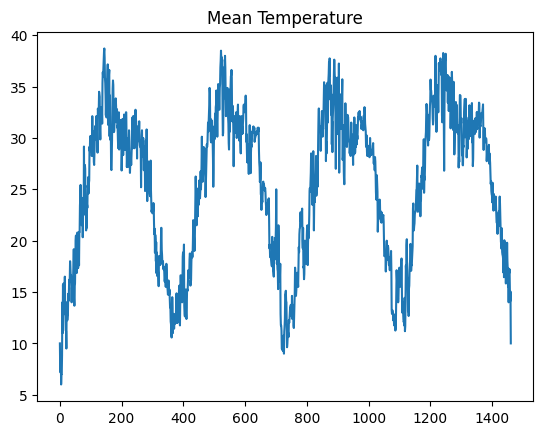

In [7]:
plt.plot(climate_train_df.meantemp)
plt.title('Mean Temperature')

Text(0.5, 1.0, 'Humidity')

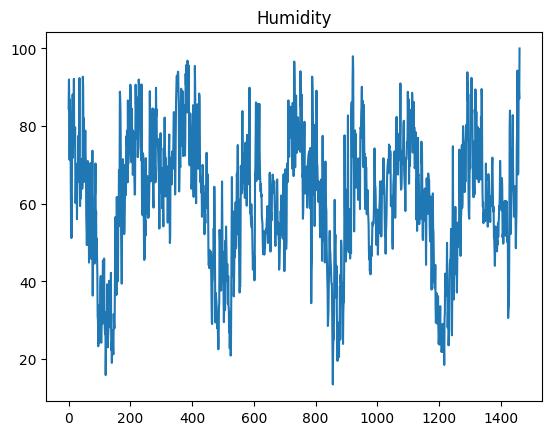

In [8]:
plt.plot(climate_train_df.humidity)
plt.title('Humidity')

In [20]:
len(range(len(climate_train_df)))

1462

Text(0.5, 1.0, 'Wind Speed')

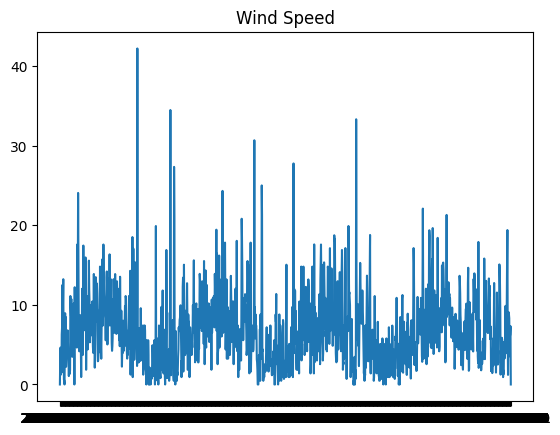

In [21]:
plt.plot(climate_train_df.wind_speed)
plt.xticks(range(len(climate_train_df)), climate_train_df.date)
plt.title('Wind Speed')

In [23]:
climate_train_df.tail(2)

,date,meantemp,humidity,wind_speed,meanpressure
1460,2016-12-31,15.052632,87.0,7.325,1016.1
1461,2017-01-01,10.000000,100.0,0.000,1016.0


In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error, r2_score

In [40]:
train = climate_train_df.copy()
train['tm1_meantemp'] = train.meantemp.shift(1)
train['tm2_meantemp'] = train.meantemp.shift(2)
train['tm1_humidity'] = train.humidity.shift(1)
train['tm2_humidity'] = train.humidity.shift(2)
train['tm1_wind'] = train.wind_speed.shift(1)
train['tm2_wind'] = train.wind_speed.shift(2)
train['tm1_meanpress'] = train.meanpressure.shift(1)
train['tm2_meanpress'] = train.meanpressure.shift(2)

train['f_temp'] = train.meantemp.shift(-1)
train['f_humidity'] = train.humidity.shift(-1)
train['f_wind'] = train.wind_speed.shift(-1)
train['f_pressure'] = train.meanpressure.shift(-1)

train = train.dropna()
train.head()

,date,meantemp,humidity,wind_speed,meanpressure,tm1_meantemp,tm2_meantemp,tm1_humidity,tm2_humidity,tm1_wind,tm2_wind,tm1_meanpress,tm2_meanpress,f_temp,f_humidity,f_wind,f_pressure
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,92.000000,84.500000,2.980000,0.000000,1017.800000,1015.666667,8.666667,71.333333,1.233333,1017.166667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,87.000000,92.000000,4.633333,2.980000,1018.666667,1017.800000,6.000000,86.833333,3.700000,1016.500000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,71.333333,87.000000,1.233333,4.633333,1017.166667,1018.666667,7.000000,82.800000,1.480000,1018.000000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,8.666667,86.833333,71.333333,3.700000,1.233333,1016.500000,1017.166667,7.000000,78.600000,6.300000,1020.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,6.000000,82.800000,86.833333,1.480000,3.700000,1018.000000,1016.500000,8.857143,63.714286,7.142857,1018.714286


In [41]:
train_x, train_y  = train.iloc[:, 1:-4], train.iloc[:,-4:]

scaler = MinMaxScaler()
scaler = scaler.fit(train_x)
s_train_x = scaler.transform(train_x)

In [42]:
train_x.head()

,meantemp,humidity,wind_speed,meanpressure,tm1_meantemp,tm2_meantemp,tm1_humidity,tm2_humidity,tm1_wind,tm2_wind,tm1_meanpress,tm2_meanpress
2,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,92.000000,84.500000,2.980000,0.000000,1017.800000,1015.666667
3,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,87.000000,92.000000,4.633333,2.980000,1018.666667,1017.800000
4,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,71.333333,87.000000,1.233333,4.633333,1017.166667,1018.666667
5,7.000000,82.800000,1.480000,1018.000000,6.000000,8.666667,86.833333,71.333333,3.700000,1.233333,1016.500000,1017.166667
6,7.000000,78.600000,6.300000,1020.000000,7.000000,6.000000,82.800000,86.833333,1.480000,3.700000,1018.000000,1016.500000


In [43]:
train_y.head()

,f_temp,f_humidity,f_wind,f_pressure
2,8.666667,71.333333,1.233333,1017.166667
3,6.000000,86.833333,3.700000,1016.500000
4,7.000000,82.800000,1.480000,1018.000000
5,7.000000,78.600000,6.300000,1020.000000
6,8.857143,63.714286,7.142857,1018.714286


In [46]:
train_y_temp = train_y.iloc[:,0]
train_y_humid = train_y.iloc[:,1]
train_y_wind = train_y.iloc[:,2]
train_y_press = train_y.iloc[:,3]

In [44]:
s_train_x

array([[0.0356623 , 0.86993243, 0.10974262, ..., 0.        , 0.132881  ,
        0.13260331],
       [0.08151383, 0.68468468, 0.02921206, ..., 0.07058266, 0.13299381,
        0.132881  ],
       [0.        , 0.86796171, 0.08763619, ..., 0.10974262, 0.13279856,
        0.13299381],
       ...,
       [0.28238719, 0.88006757, 0.14211274, ..., 0.19741829, 0.1325901 ,
        0.1328029 ],
       [0.24745269, 0.90146396, 0.14842886, ..., 0.08403188, 0.13276447,
        0.1325901 ],
       [0.276718  , 0.86993243, 0.17349597, ..., 0.14211274, 0.13289464,
        0.13276447]])

In [ ]:
tempModel = SVR(kernel='linear')
tempModel.fit()